In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore

In [2]:
df1=pd.read_csv(r"D:\Data Science\vikki datasets\datasets\abalone.csv")
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D02FDAB388>,
      dtype=object)

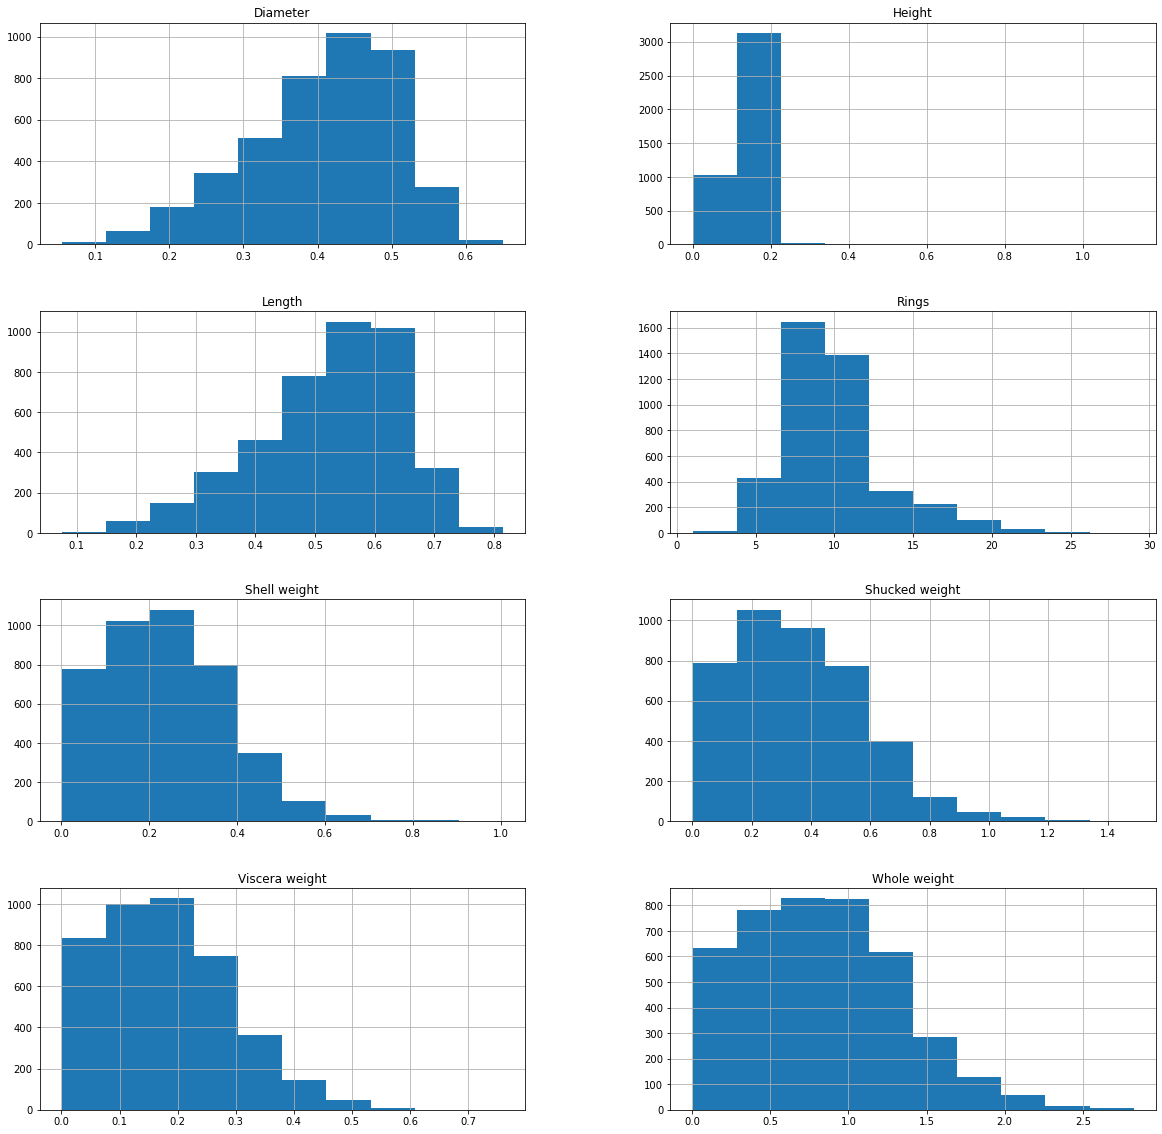

In [4]:
df1.hist(figsize=(20,20),grid=True,layout=(4,2))

In [5]:
df2=df1.copy()
df2.drop(['Sex'],axis='columns',inplace=True)

In [6]:
df2=df2.apply(zscore)
df2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [7]:
df3=df2.copy()
df3['Sex']=df1['Sex']
df3=df3[df1.columns]
df3

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,M,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,F,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,M,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,I,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...,...
4172,F,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,M,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,M,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,F,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


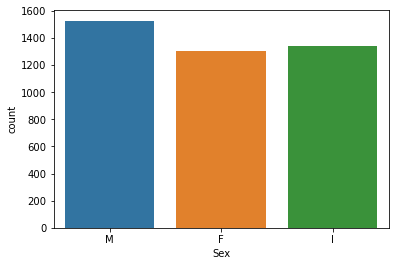

In [8]:
sns.countplot(x='Sex',data=df1)

In [9]:
from sklearn.cluster import KMeans

cluster_range=range(1,15)
cluster_inertia=[]

for i in cluster_range:
    model=KMeans(i)
    model.fit(df2)
    cluster_inertia.append(model.inertia_)
    
cluster_values_df=pd.DataFrame({'cluster_range':cluster_range,'cluster_inertia':cluster_inertia})
cluster_values_df

,cluster_range,cluster_inertia
0,1,33416.000000
1,2,14612.698026
2,3,9922.841740
3,4,7867.663216
4,5,6799.366419
5,6,5837.626370
6,7,5282.173544
7,8,4752.525073
8,9,4287.676803
9,10,3929.417328


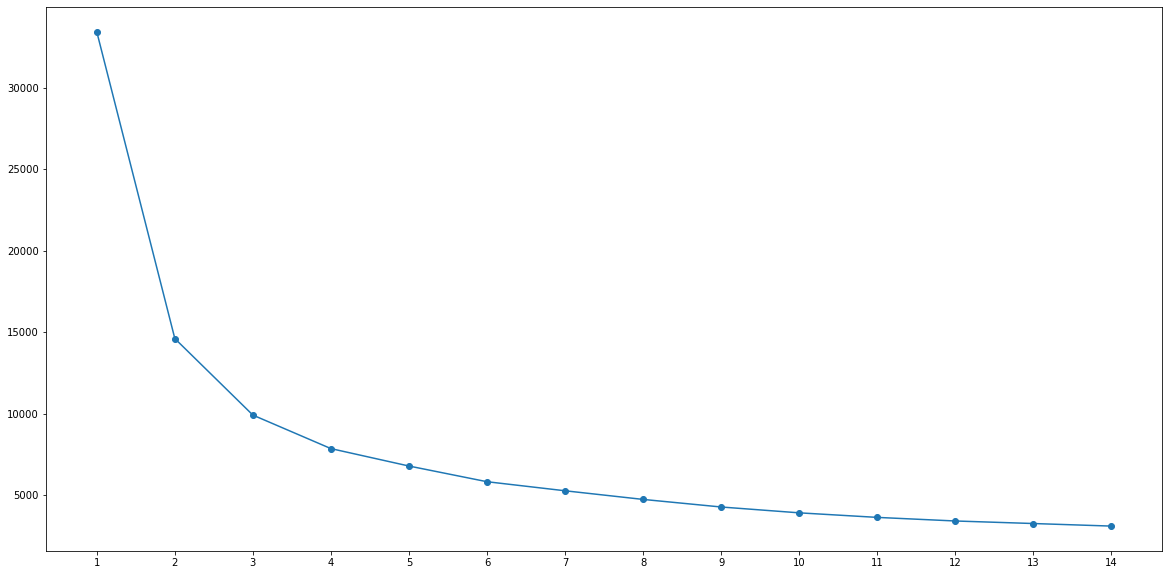

In [10]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,15,1))
plt.plot(cluster_values_df['cluster_range'],cluster_values_df['cluster_inertia'],marker='o')
plt.show()

In [11]:
model=KMeans(3)
model.fit(df2)

KMeans(n_clusters=3)

In [12]:
centroid_values=model.cluster_centers_
centroid_values

array([[ 1.0445745 ,  1.05015601,  0.99048795,  1.23614605,  1.19274926,
         1.21312913,  1.19030458,  0.6238421 ],
       [ 0.14716069,  0.14412798,  0.08012817, -0.07114872, -0.07732499,
        -0.06981954, -0.04724389,  0.14922604],
       [-1.26894428, -1.26999291, -1.11407122, -1.13351142, -1.08069942,
        -1.11241216, -1.12339341, -0.84989978]])

In [13]:
centroid_values_df=pd.DataFrame(centroid_values,columns=list(df2))
centroid_values_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.044575,1.050156,0.990488,1.236146,1.192749,1.213129,1.190305,0.623842
1,0.147161,0.144128,0.080128,-0.071149,-0.077325,-0.069820,-0.047244,0.149226
2,-1.268944,-1.269993,-1.114071,-1.133511,-1.080699,-1.112412,-1.123393,-0.849900


In [14]:
labels=model.labels_
labels

array([1, 2, 1, ..., 0, 0, 0])

In [15]:
labels_df1=pd.DataFrame(labels,columns=list(['label']))
labels_df1

,label
0,1
1,2
2,1
3,1
4,2
...,...
4172,1
4173,1
4174,0
4175,0


In [16]:
labels_df1['label']=labels_df1['label'].astype('category')
labels_df2=df2.copy()
labels_df2=labels_df2.join(labels_df1)
labels_df2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,label
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,2
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,2
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765,1
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571,1
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624,0
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571,0


In [17]:
labels_df2['label'].value_counts()

1    1783
0    1202
2    1192
Name: label, dtype: int64

In [18]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

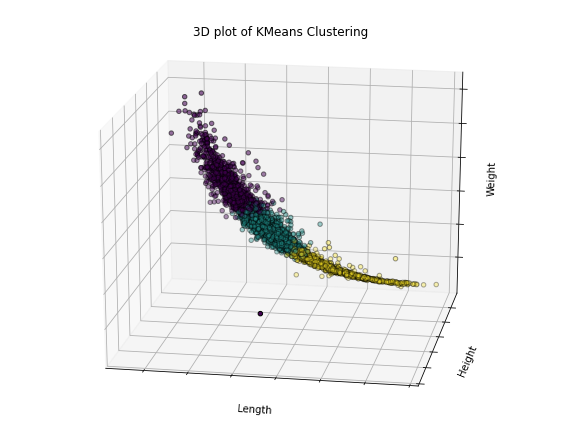

In [19]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1],elev=20,azim=100)
ax.scatter(df2['Length'],df2['Height'],df2['Whole weight'],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')